In [80]:
import torch
import numpy as np
import os
import seaborn as sns
import matplotlib as plt

import matplotlib.pyplot as pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import random

from sklearn.linear_model import LassoCV

## Daten laden

In [2]:
directory_path = 'activations'

# Create an empty list to store file names
files_list = []

# List all files in the specified path and add them to the list
for entry in os.listdir(directory_path):
    full_path = os.path.join(directory_path, entry)
    if os.path.isfile(full_path):
        files_list.append(entry)

files_list.sort()
len(files_list)

100

In [3]:
vec = []
label = []
for name in files_list:
    loaded_tensor = torch.load('activations/'+name)
    numpytensor = loaded_tensor.cpu().numpy()
    vec.append(numpytensor[0,0,:])
    label.append(int(name.split("_")[0][3:]))
    
matrix = np.vstack(vec)
matrix.shape

(100, 50257)

## Activations

In [98]:
matrix[6]

array([-25.896849, -25.14396 , -26.919643, ..., -33.322906, -31.456982,
       -22.617302], dtype=float32)

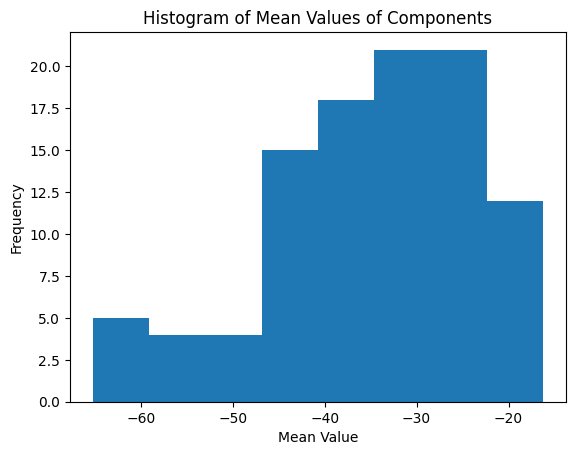

In [99]:
means = np.mean(matrix, axis=1)

# Visualize the means as a histogram
pyplot.hist(means, bins='auto')
pyplot.title('Histogram of Mean Values of Components')
pyplot.xlabel('Mean Value')
pyplot.ylabel('Frequency')
pyplot.show()

## Regression

In [76]:
def lin_model(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    #model = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(y_test)
    print(y_pred)

    # The coefficients
    #print('Coefficients:', model.coef_)
    #selected_features = np.where( model.coef_ != 0)[0]
    #print(len(selected_features))

    # The mean squared error
    print('Mean squared error:', mean_squared_error(y_test, y_pred))
    # The intercept
    print('Intercept:', model.intercept_)

    # Calculate R^2 Score
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 Score: {r2}")

    return model.coef_


In [77]:
X = matrix
y = np.array(label) 

lin_model(X,y)

[ 8  5  7  4  4 13 12  8 11 10 11 13  7 13  9 10  7  7 11 13]
[ 7.831462   4.6698885  7.0056114  3.9631252  3.9004495 12.871763
 11.77821    8.008309  10.729599  10.289242  10.740157  12.8919325
  7.073897  12.552952   8.746051   9.901032   6.889816   7.2083664
 10.804508  12.576208 ]
Mean squared error: 0.050166530380127486
Intercept: 7.582724
R^2 Score: 0.9941170881993401


array([ 1.19586941e-04, -1.03871804e-04,  2.80190259e-04, ...,
       -1.47360217e-04, -1.19503002e-05, -7.62669588e-05], dtype=float32)

[ 8  5  7  4  4 13 12  8 11 10 11 13  7 13  9 10  7  7 11 13]
[ 7.3368063  5.0140276  6.5345497  2.5631437  4.1642494 12.976556
 11.006326   8.136896   9.324634   9.756571   9.942153  12.583745
  7.0285625 12.335769   8.626891   9.754847   7.786348   7.9053764
 10.184914  12.302382 ]
Mean squared error: 0.5571856505418168
Intercept: 11.432176
R^2 Score: 0.9346601406576586
20


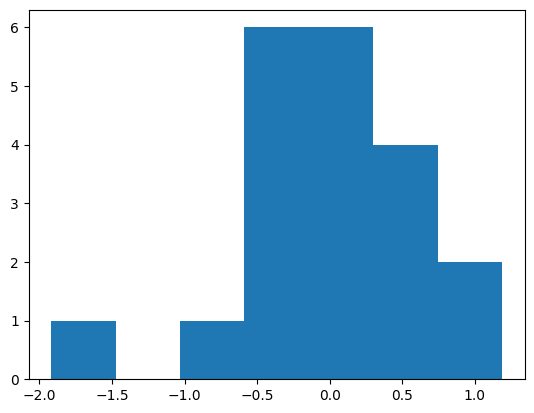

In [103]:
X = matrix[:, :20]
y = np.array(label)

modelco = lin_model(X,y)

print(len(modelco,))
pyplot.hist(modelco, bins='auto')  # 'auto' lets Matplotlib decide the number of bins
# Show the plot
pyplot.show()

[ 8  5  7  4  4 13 12  8 11 10 11 13  7 13  9 10  7  7 11 13]
[ 6.7591205  6.2336054  9.331707   8.235909   5.7674546 13.395142
  9.504531   8.629136   8.851776  10.61975    9.235131  12.443867
  8.521058  12.322084   7.847962   8.62077    8.030107   9.039541
  8.603385  12.343891 ]
Mean squared error: 3.1082653522011583
Intercept: 11.06793
R^2 Score: 0.6355009847902482
20


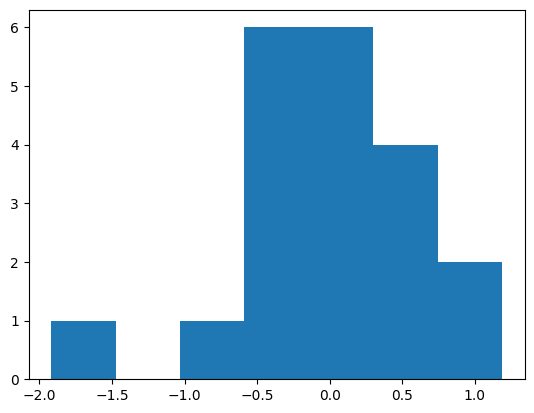

In [101]:
random_values = random.sample(range(matrix.shape[1]), 10)
X = matrix[:, random_values]
y = np.array(label)

lin_model(X,y)
print(len(modelco,))
pyplot.hist(modelco, bins='auto')  # 'auto' lets Matplotlib decide the number of bins
# Show the plot
pyplot.show()

In [104]:
def eval_model(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    #model = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate R^2 Score
    r2 = r2_score(y_test, y_pred)
   
    return r2

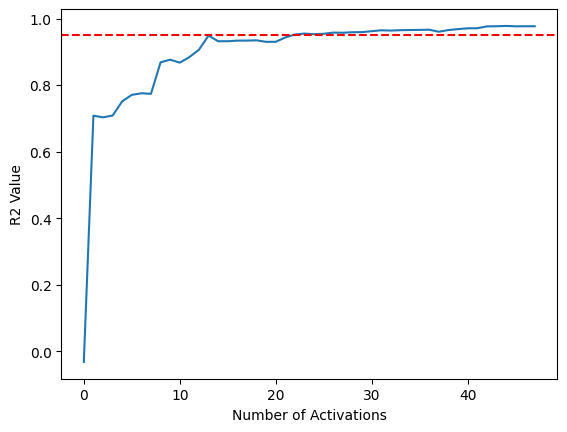

In [136]:
kvals = []
for k in range(2,50):
    X = matrix[:, :k]
    y = np.array(label)
    r2 = eval_model(X,y)
    kvals.append(r2)
pyplot.plot(kvals)
pyplot.xlabel('Number of Activations')
pyplot.ylabel('R2 Value')
pyplot.axhline(y=0.95, color='r', linestyle='--')
pyplot.show()

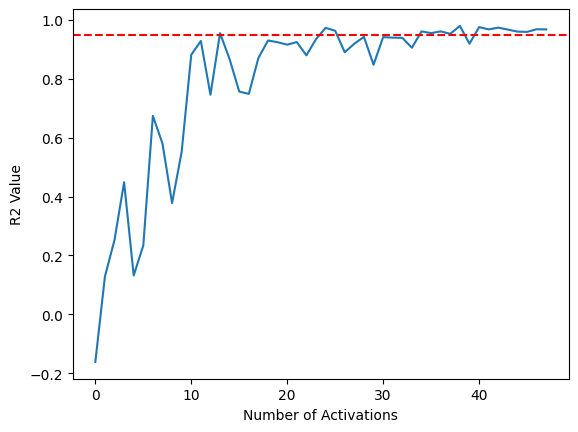

In [137]:
kvals = []
for k in range(2,50):
    random_values = random.sample(range(matrix.shape[1]), k)
    X = matrix[:, random_values]
    y = np.array(label)
    r2 = eval_model(X,y)
    kvals.append(r2)
pyplot.plot(kvals)
pyplot.xlabel('Number of Activations')
pyplot.ylabel('R2 Value')
pyplot.axhline(y=0.95, color='r', linestyle='--')
pyplot.show()

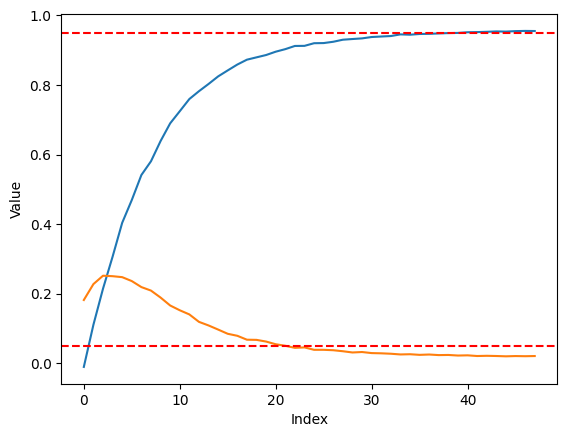

In [134]:
kvals = []
stds=[]
for k in range(2,50):
    r2s = []
    for i in range(1000):
        random_values = random.sample(range(matrix.shape[1]), k)
        X = matrix[:, random_values]
        y = np.array(label)

        r2 = eval_model(X,y)
        r2s.append(r2)
        #print(r2)
    #print(np.mean(r2s))
    kvals.append(np.mean(r2s))
    stds.append(np.std(r2s))
pyplot.plot(kvals)
pyplot.plot(stds)
pyplot.xlabel('Number of Activations')
pyplot.ylabel('R2 Value')
pyplot.axhline(y=0.95, color='r', linestyle='--')
pyplot.axhline(y=0.05, color='r', linestyle='--')
pyplot.show()
